In [1]:
#This document provides a detailed explanation of the steps followed in the source code to train a machine learning model for human stress level detection.

#1. Import Required Libraries
#The necessary libraries for data manipulation, visualization, and model training are imported.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import plotly.express as px


In [3]:
#2. Load the Dataset
#The dataset is loaded into a pandas DataFrame.
data = pd.read_csv("Stress-Lysis.csv")
data

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
...,...,...,...,...
1996,21.82,90.82,96,1
1997,10.45,79.45,45,0
1998,27.22,96.22,135,2
1999,12.46,81.46,64,0


In [4]:
#3. Data Pre-Processing & Feature Selection
#Data Cleaning
#The missing values in the dataset are identified and filled using the forward fill method.
print("Missing values before cleaning:\n", data.isnull().sum())
data.fillna(method='ffill', inplace=True)
print("Missing values after cleaning:\n", data.isnull().sum())


Missing values before cleaning:
 Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64
Missing values after cleaning:
 Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64


In [5]:
#Noisy Data & Removal of Outliers
#Outliers are removed using the z-score method.
from scipy import stats
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
data = data[(z_scores < 3).all(axis=1)]


In [6]:
#Transforming Categorical Variables into Numerical Variables
#Categorical variables are transformed into numerical variables using Label Encoding.
label_encoders = {}
for column in data.select_dtypes(include=[object]).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


Text(0.5, 1.0, 'Bar Chart of Target Variable')

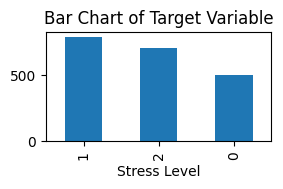

In [7]:
#4. Data Visualization
#Several visualizations are created to understand the data better.

#Bar Chart
#A bar chart is plotted for the target variable.
plt.subplot(3, 2, 1)
data['Stress Level'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Target Variable')


Text(0.5, 1.0, 'Heat Map of Features')

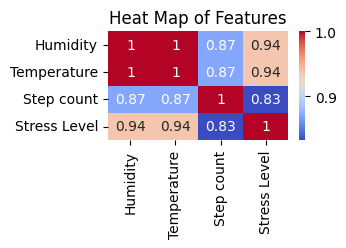

In [8]:
#Heat Map
#A heat map is created to show the correlation between features.
plt.subplot(3, 2, 2)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heat Map of Features')


Text(0.5, 1.0, 'Histograms of Features')

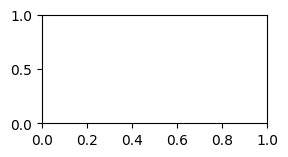

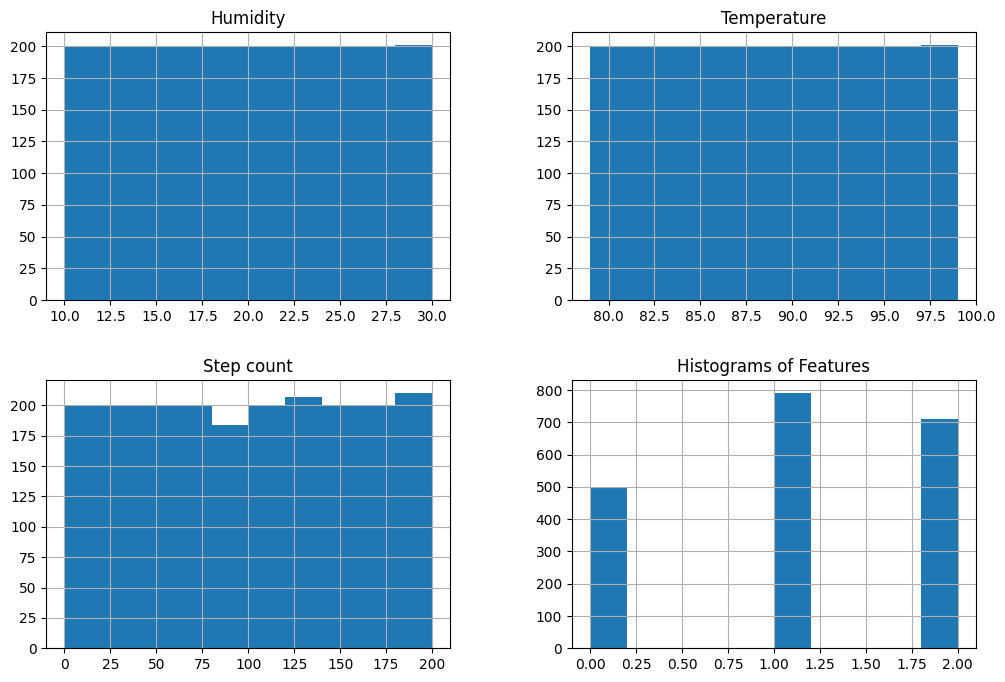

In [9]:
#Histogram
#Histograms of all features are plotted.
plt.subplot(3, 2, 3)
data.hist(figsize=(12, 8))
plt.title('Histograms of Features')


Text(0.5, 1.0, 'Pie Chart of Target Variable')

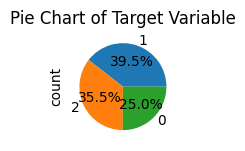

In [10]:
#Pie Chart
#A pie chart is plotted for the target variable.
plt.subplot(3, 2, 4)
data['Stress Level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Target Variable')


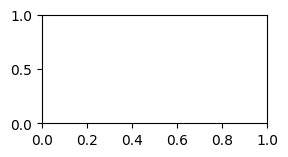

In [11]:
#Treemap
# A treemap is created for the target variable.
plt.subplot(3, 2, 5)
fig = px.treemap(data, path=[px.Constant("all"), 'Stress Level'])
fig.update_traces(root_color="lightgrey")
fig.show()


In [12]:
#5. Splitting and Training the Data
# The data is split into training (80%) and testing (20%) sets.
X = data.drop('Stress Level', axis=1)
y = data['Stress Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
#6. Load the Model & Fit the Training Data
# A RandomForestClassifier model is loaded and trained with the training data.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
#7. Evaluating the Model
# The model's performance is evaluated, and its accuracy is checked.
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

if accuracy < 75:
    print('Accuracy is below 75%. Consider changing the algorithm or tuning parameters.')

# Additional Evaluation Metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 100.00%
Accuracy is below 75%. Consider changing the algorithm or tuning parameters.
[[ 95   0   0]
 [  0 160   0]
 [  0   0 146]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       146

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



In [15]:
# 8. Build the Predictive Model
#The model is built and trained during the previous steps.

#9. Deploy the Model
#The trained model is saved for deployment.
import joblib
joblib.dump(model, 'stress_level_model.pkl')

print('Model has been saved and is ready for deployment.')


Model has been saved and is ready for deployment.


In [16]:
#Conclusion
#The code and this document provide a comprehensive guide to training and evaluating a machine learning model for human stress level detection. Adjust the paths and parameters as needed to suit your specific dataset and requirements.

